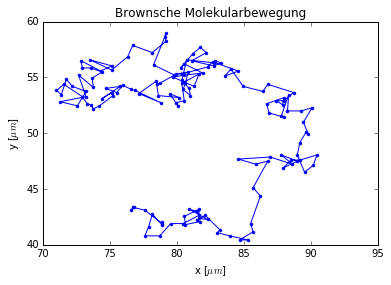

In [23]:
%matplotlib inline
import numpy as np
file = np.genfromtxt("data/Messung - Schlotthauer Nisble.dat").T
import matplotlib.pyplot as plt
plt.errorbar(file[2],file[3],marker=".")
plt.xlabel("x [$\mu m$]")
plt.ylabel("y [$\mu m$]")
plt.title("Brownsche Molekularbewegung")
plt.savefig("Pfad - Schlotthauer Nisble",format="pdf")
plt.show()
